# Bab Pengenalan
Nama : Praduta Firman

FTDS-Batch 002

Sumber Dataset : https://www.kaggle.com/hellbuoy/pca-kmeans-hierarchical-clustering?select=Country-data.csv

Dataset :  Sebuah lembaga LSM yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara kurang mampu. Baru-baru ini, mereka telah mampu mengumpulkan sekitar $ 10 juta. Sekarang CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Isu signifikan yang muncul saat membuat keputusan ini sebagian besar terkait dengan pemilihan negara yang paling membutuhkan bantuan.

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

# Data Loading

In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [5]:
df.shape

(167, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# Data Cleaning

In [9]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

tidak terdapat missing values

# Eksplorasi Data

In [10]:
num_dat = df [df.describe().columns.values]
cat_dat = df.drop(columns = df.describe().columns.values)

IndexError: index 2 is out of bounds for axis 0 with size 2

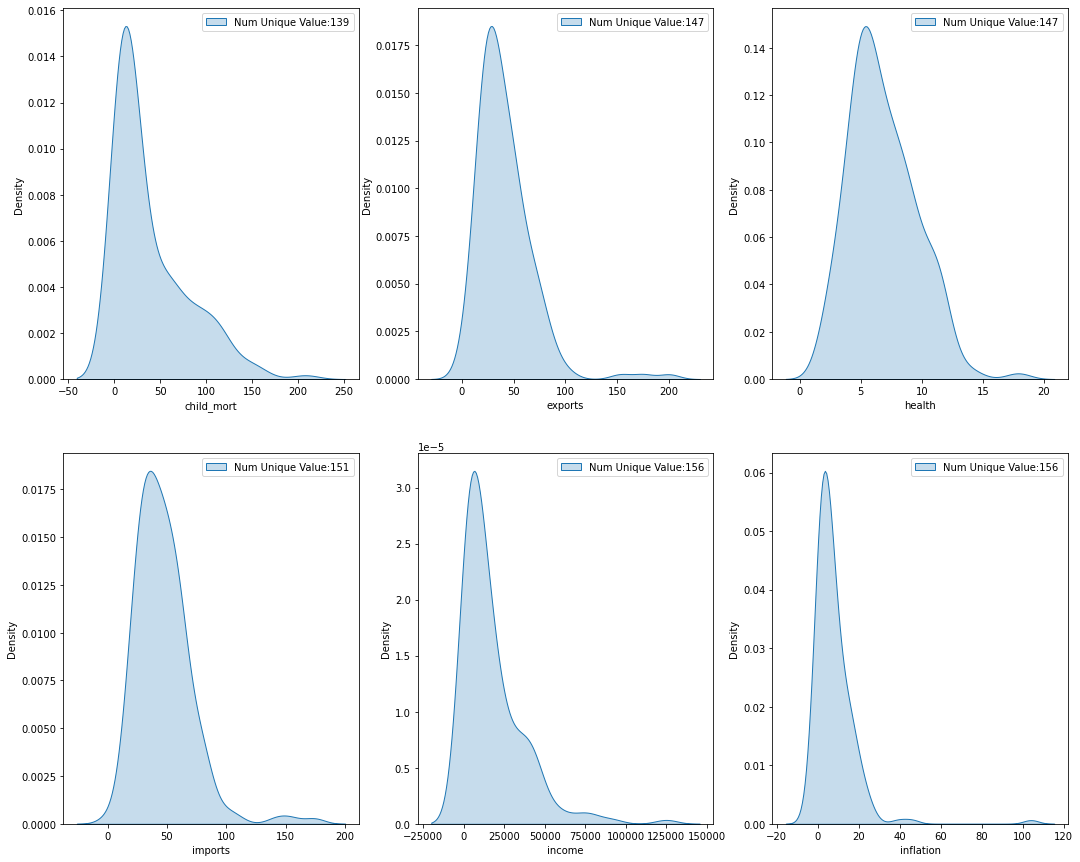

In [11]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(18,15))
i=0
j=0
for col in num_dat.columns:
    sns.kdeplot(data=num_dat, x=col, fill=True,ax=axes[i][j],label='Num Unique Value:{}'.format(len(num_dat[col].unique())))
    axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0

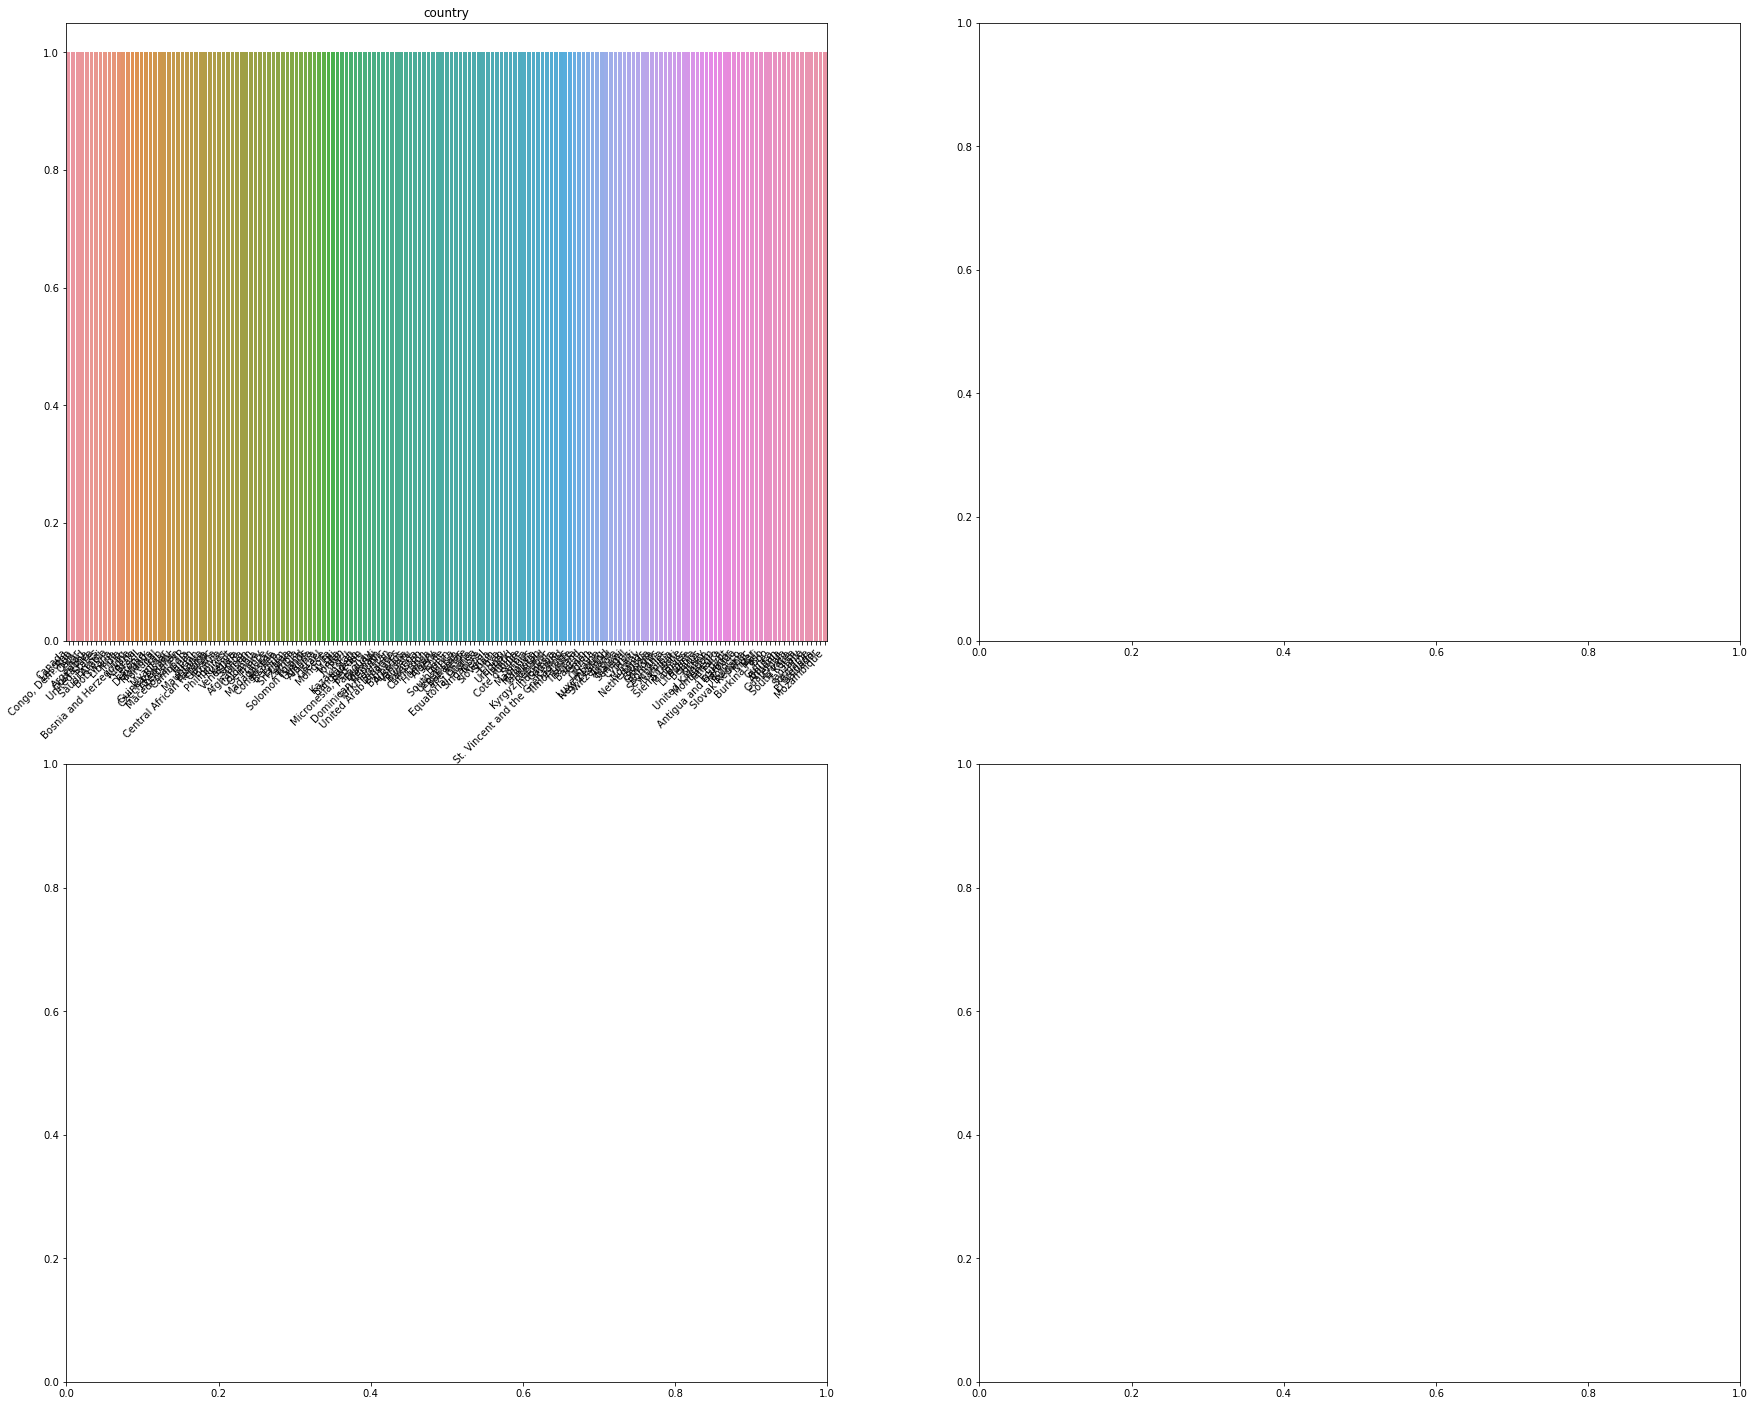

In [12]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(30,25))
i=0
j=0

for col in cat_dat.columns:
    val=cat_dat[col].value_counts()
    sns.barplot(x=val.index, y=val.values, ax=axes[i][j])
    axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=45, ha='right')
    axes[i][j].set_title(col)
    j+=1
    if j>3:
        i+=1
        j=0

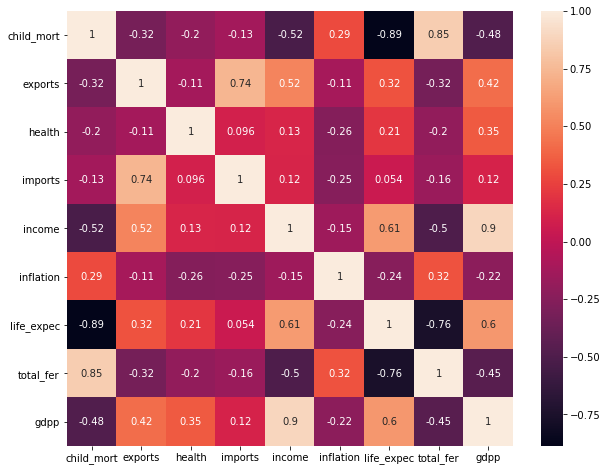

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

EDA Analysis :

- Tingginya kematian anak di bawah 5 tahun dipengaruhi oleh jumlah total anak yang lahir dikarenakan tingkat fertilitas yang rendah

- Tingginya nilai export dipengaruhi oleh nilai import, begitu pun sebaliknya. Nilai import yang tinggi dikarenakan faktor export.

- Kemudian pendapatan yang kita dapat akan tinggi bila sebanding dengan total GDP per kapitanya.

- Dan harapan kehidupan yang tinggi dipengaruhi oleh jumlah pendapatan yang akan didapat.

# Data Processing

# Feature Engineering 

In [14]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [15]:
le =LabelEncoder()

In [16]:
country_mapping = { k: i for i, k in enumerate(df['country'].unique(), 0)}

print('\n')
print('country: \n',country_mapping)



country: 
 {'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Angola': 3, 'Antigua and Barbuda': 4, 'Argentina': 5, 'Armenia': 6, 'Australia': 7, 'Austria': 8, 'Azerbaijan': 9, 'Bahamas': 10, 'Bahrain': 11, 'Bangladesh': 12, 'Barbados': 13, 'Belarus': 14, 'Belgium': 15, 'Belize': 16, 'Benin': 17, 'Bhutan': 18, 'Bolivia': 19, 'Bosnia and Herzegovina': 20, 'Botswana': 21, 'Brazil': 22, 'Brunei': 23, 'Bulgaria': 24, 'Burkina Faso': 25, 'Burundi': 26, 'Cambodia': 27, 'Cameroon': 28, 'Canada': 29, 'Cape Verde': 30, 'Central African Republic': 31, 'Chad': 32, 'Chile': 33, 'China': 34, 'Colombia': 35, 'Comoros': 36, 'Congo, Dem. Rep.': 37, 'Congo, Rep.': 38, 'Costa Rica': 39, "Cote d'Ivoire": 40, 'Croatia': 41, 'Cyprus': 42, 'Czech Republic': 43, 'Denmark': 44, 'Dominican Republic': 45, 'Ecuador': 46, 'Egypt': 47, 'El Salvador': 48, 'Equatorial Guinea': 49, 'Eritrea': 50, 'Estonia': 51, 'Fiji': 52, 'Finland': 53, 'France': 54, 'Gabon': 55, 'Gambia': 56, 'Georgia': 57, 'Germany': 58, 'Ghana': 5

In [17]:
df['country'] = df['country'].map(country_mapping)

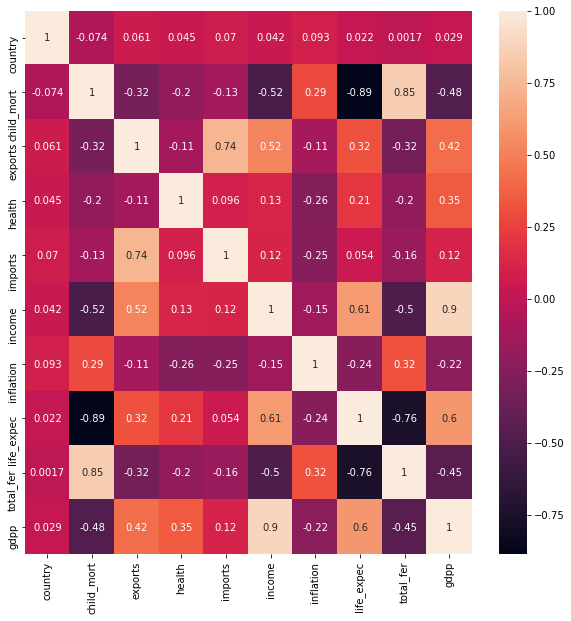

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

In [19]:
num_dat=df.drop(columns=['income','country','gdpp'])

# Pendefinisian Model

In [20]:
scaler=StandardScaler()
num_dat_std=scaler.fit_transform(num_dat)

# Pelatihan Model

# PCA

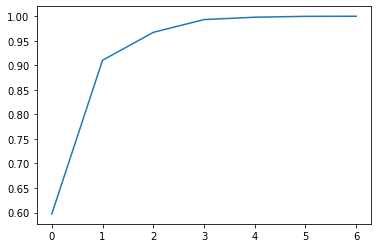

In [21]:
pca=PCA(whiten=True)
pca.fit(num_dat)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

In [22]:
np.sum(pca.explained_variance_ratio_)

1.0

<AxesSubplot:>

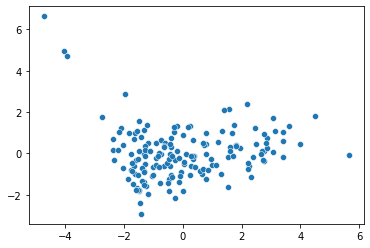

In [23]:
X2D = PCA(n_components=2).fit_transform(num_dat_std)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1])

# Unsupervised Model Implementation

# K-Means

Elbow Method

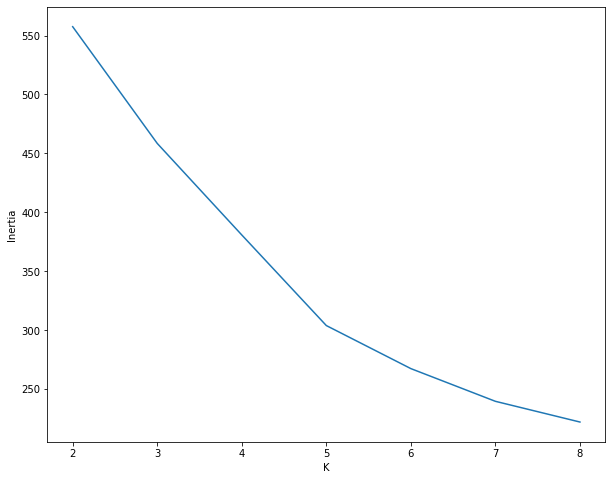

In [24]:
K=[2,3,4,5,6,7,8]
X_reduced=scaler.fit_transform(np.append(X2D,df[['income','country','gdpp']],axis=1))

inertia=[KMeans(n_clusters=i).fit(X_reduced).inertia_ for i in K]
plt.subplots(figsize=(10,8))
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show();

Silhouette Plot

Text(0, 0.5, 'Silhouettte Score')

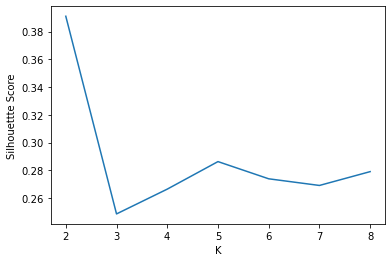

In [25]:
K=[2,3,4,5,6,7,8]
#inertia=[KMeans(n_clusters=i).fit(X2D).inertia_for i in K]
s_score=[silhouette_score(X_reduced, KMeans(n_clusters=i).fit(X_reduced).labels_)for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouettte Score')

In [26]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.39103676728745823
For n_clusters = 3 The average silhouette_score is : 0.2478476762234728
For n_clusters = 4 The average silhouette_score is : 0.2608944832917262
For n_clusters = 5 The average silhouette_score is : 0.2864199814903173
For n_clusters = 6 The average silhouette_score is : 0.28064691435009054
For n_clusters = 7 The average silhouette_score is : 0.27267770255904267
For n_clusters = 8 The average silhouette_score is : 0.27977162654064797


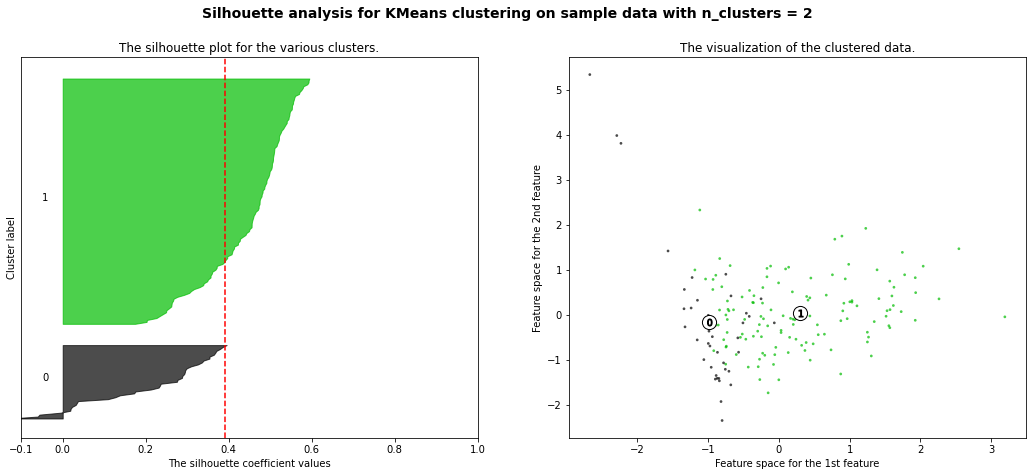

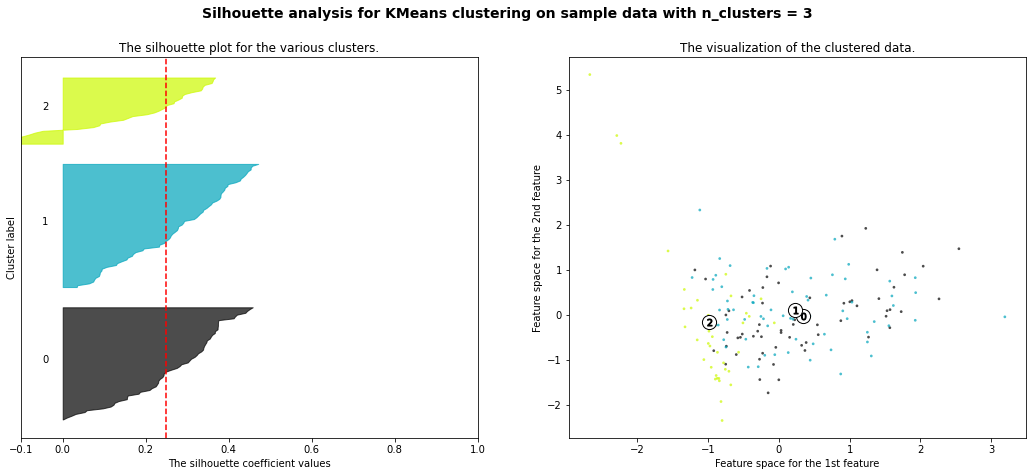

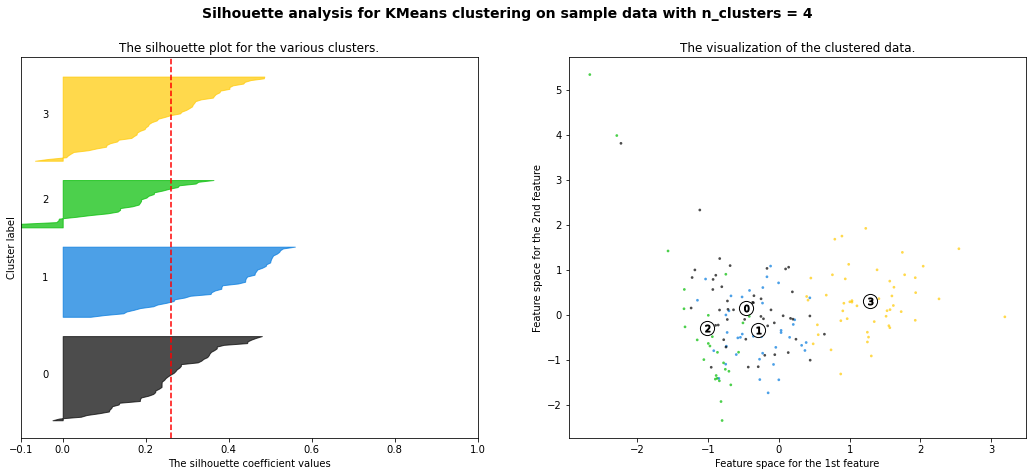

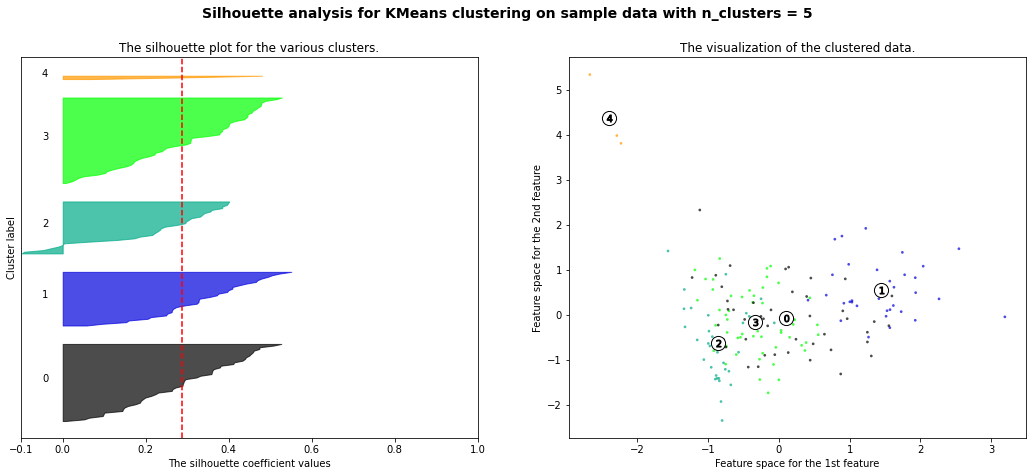

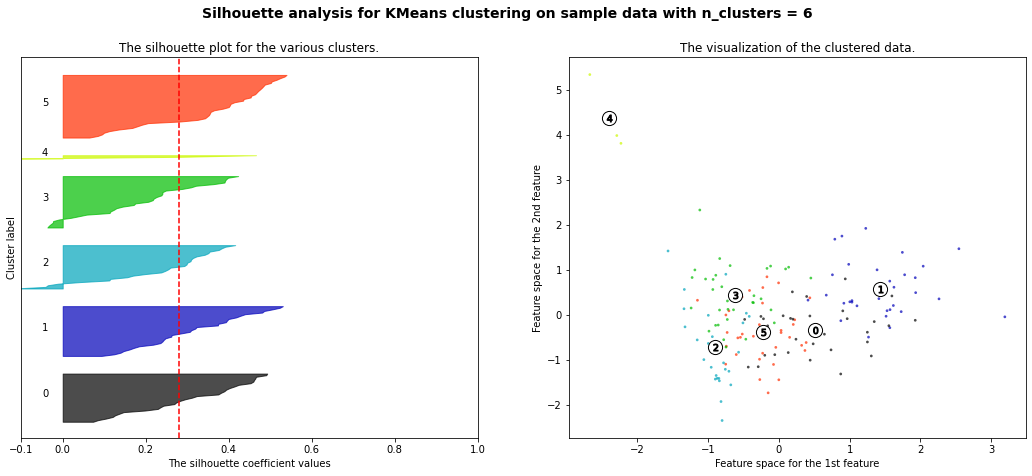

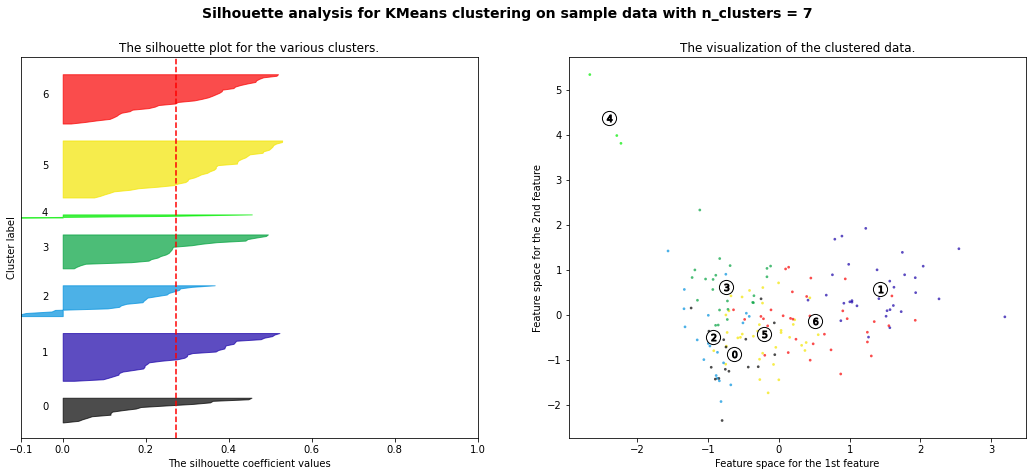

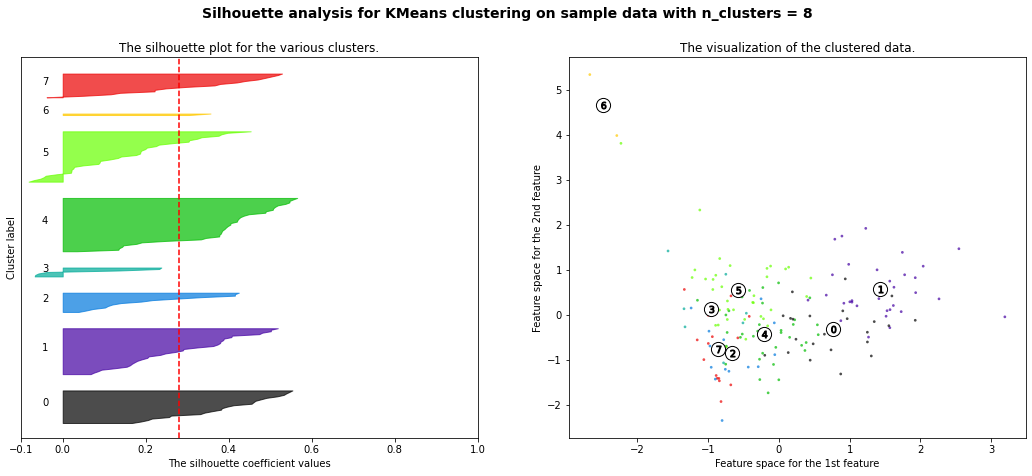

In [27]:
plot_silhouette(K,X_reduced)

In [28]:
scaler=StandardScaler()
X = scaler.fit_transform(df.drop(columns=['country','gdpp']))
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

# Evaluasi Model

In [29]:
df['Cluster'] = kmeans.labels_

In [30]:
df.set_index('Cluster')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,,
1,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
0,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
0,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
1,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
0,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
0,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
0,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
0,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [31]:
df.Cluster.unique()

array([1, 0])

In [32]:
df.groupby('Cluster').mean()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,,
0,82.347826,15.401739,46.944348,7.062261,49.026957,23164.00,5.949661,75.377391,2.100522,17997.426087
1,84.442308,88.844231,28.203827,6.270385,42.164729,3832.75,11.833750,59.892308,4.822115,1832.884615


# Perbandingan Cluster 0 dan 1

- Rata - rata total gdp per kapita tertinggi ada pada cluster 0
- Rata - rata anak di bawah 5 tahun meninggal tertinggi terdapat pada cluster 1
- Rata - rata kesehatan yang lebih tinggi ada pada cluster 0
- Rata - rata pendapatan tertinggi ada pada cluster 0

- Jadi Rata - rata kehidupan yang lebih terjamin ada pada negara di cluster 0, sementara negara di cluster 1 perlu dibantu untuk memerangi kemiskinan dan disediakan fasilitas dan bantuan dasar bagi masyarakat pada cluster 1.

# Model Inference

In [33]:
values = [[82, 15, 46, 7, 49, 23164, 5, 75, 2, 17997]]

In [34]:
data_dummies = pd.DataFrame(values,columns=['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])

In [35]:
data_dummies

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,82,15,46,7,49,23164,5,75,2,17997


# Overall Analysis

- Pada saat mengcluster data yang direduksi oleh PCA adalah numerik continous : child mort,exports,health,imports,inflation,life expectancy, dan total fertility rate

- Setelah mengcluster data dievaluasi ke KMeans

- Kemudian saya buat inertia dan silhouette ke angka 2

- Setiap cluster bisa terus berubah tergantung dari penghitungan KMeansnya.